In [1]:
import os
import logging
from pprint import *
from gensim.models import word2vec
from gensim.models import FastText
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.font_manager as fm

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
base_path = "/content/gdrive/My Drive/Colab Notebooks/language/"

워드임베딩
input name : toji_test.txt


2020-07-21 01:30:23,591 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-07-21 01:30:23,594 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-07-21 01:30:23,653 : INFO : collected 33004 word types from a corpus of 74265 raw words and 5761 sentences
2020-07-21 01:30:23,654 : INFO : Loading a fresh vocabulary
2020-07-21 01:30:23,766 : INFO : effective_min_count=2 retains 8935 unique words (27% of original 33004, drops 24069)
2020-07-21 01:30:23,767 : INFO : effective_min_count=2 leaves 50196 word corpus (67% of original 74265, drops 24069)
2020-07-21 01:30:23,800 : INFO : deleting the raw counts dictionary o

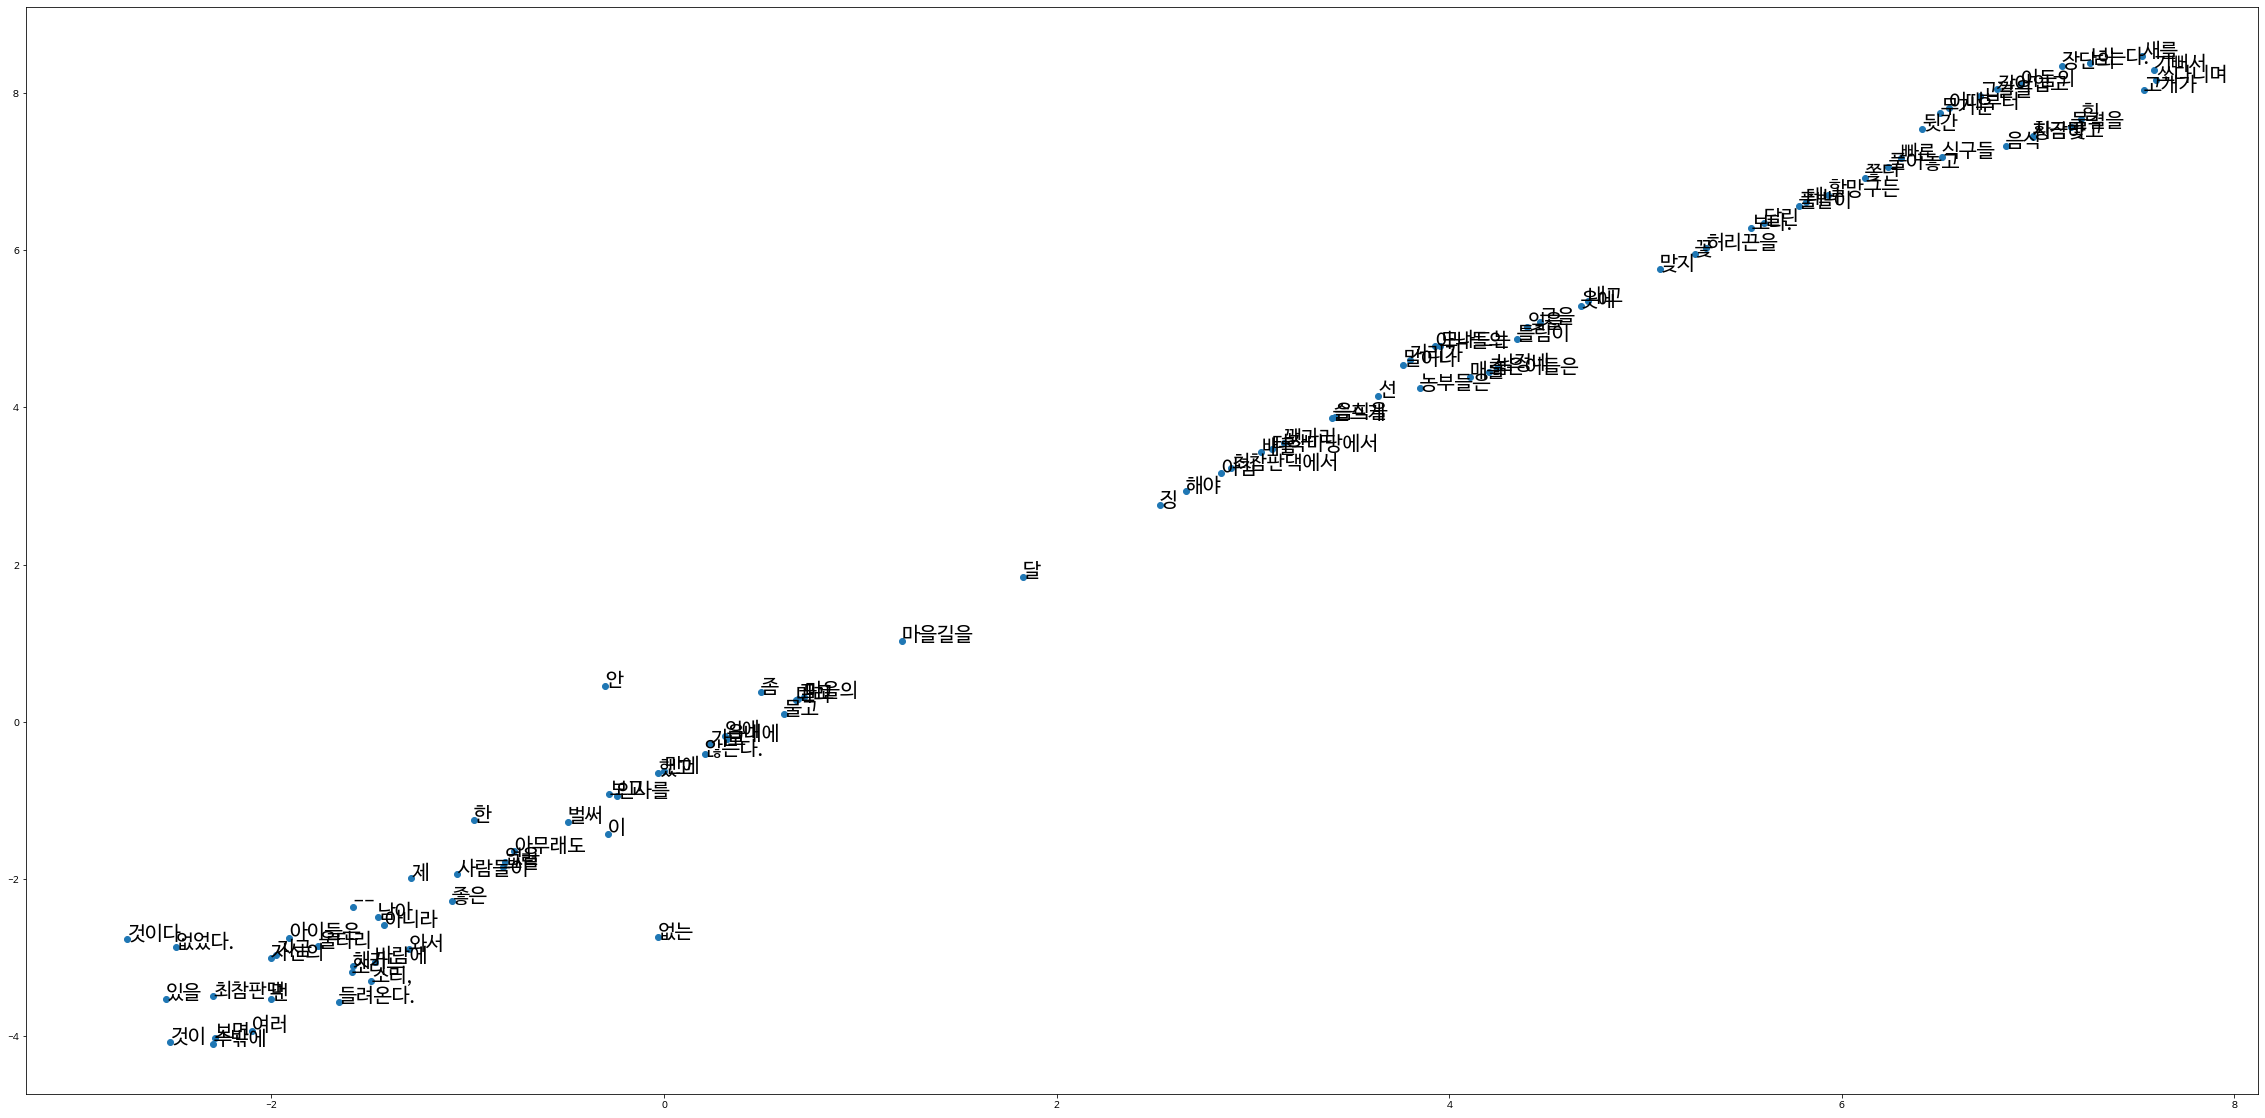

2020-07-21 01:30:30,468 : INFO : loading Word2Vec object from skipgram_lemma.model
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-07-21 01:30:30,603 : INFO : loading wv recursively from skipgram_lemma.model.wv.* with mmap=None
2020-07-21 01:30:30,604 : INFO : setting ignored attribute vectors_norm to None
2020-07-21 01:30:30,607 : INFO : loading vocabulary recursively from skipgram_lemma.model.vocabulary.* with mmap=None
2020-07-21 01:30:30,609 : INFO : loading trainables recursively from skipgram_lemma.model.trainables.* with mmap=None
2020-07-21 01:30:30,610 : INFO : setting ignored attribute cum_table to None
2020-07-21 01:30:30,611 : INFO : loaded skipgram_lemma.model
2020-07

[('자리에', 0.9998720288276672),
 ('오히려', 0.9998711347579956),
 ('있었는데', 0.9998651742935181),
 ('치수', 0.9998644590377808),
 ('남아', 0.9998639225959778),
 ('못하는', 0.9998604655265808),
 ('나머지', 0.999859094619751),
 ('간난할멈이', 0.9998560547828674),
 ('몸이', 0.9998552203178406),
 ('울음을', 0.9998548030853271)]
0.9995905


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
# =============================================================================
#    파일 입력
# =============================================================================
print('=' * 50)
print('워드임베딩')
print('=' * 50)

in_fname = input('input name : ')
    
# =============================================================================
#    워드임베딩 시작
# =============================================================================
data = word2vec.LineSentence(base_path+in_fname)
model = word2vec.Word2Vec(data,
                          size=200,         # Dimensionality of the word vectors
                          window=10,        # Maximum distance between the current and predicted word within a sentence
                          hs=0,             # If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.                          
                          sg=1,             # Training algorithm: 1 for skip-gram; otherwise CBOW.
                          min_count=2,
                          workers=6         # Number of the threads   
                          )
model.save('skipgram_lemma.model')

"""
model = word2vec.Word2Vec(data,
                          size=200,         # Dimensionality of the word vectors
                          window=10,        # Maximum distance between the current and predicted word within a sentence
                          hs=0,             # If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.                          
                          sg=0,             # Training algorithm: 1 for skip-gram; otherwise CBOW.
                          min_count=2,
                          workers=6         # Number of the threads   
                          )
model.save('cbow_lemma.model')

model = FastText(data, 
                 size=200, 
                 window=10, 
                 hs=0, 
                 sg=1, 
                 min_count=2, 
                 workers=6)
model.save('fasttext_lemma.model')
"""
# =============================================================================
#    워드임베딩 결과 시각화
# =============================================================================
mpl.rcParams['axes.unicode_minus'] = False
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:100,:])
plt.rc('font', family='NanumBarunGothic')

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=20)

fig = plt.gcf()
plt.show()
fig.savefig('word2vec.pdf')

# =============================================================================
#    워드임베딩 결과 평가
# =============================================================================
sg_model = word2vec.Word2Vec.load('skipgram_lemma.model')
pprint(sg_model.wv.most_similar('어둠'))
# print(sg_model.wv.similarity('어둠', '발소리'))
print(sg_model.wv.similarity('어둠', '서서방'))